In [ ]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Infosys/day.csv', encoding= 'unicode_escape')

In [ ]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (730, 16) 
 Total Rows are : 730
 Total Columns are : 16


In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
dataset.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,31-12-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [ ]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


In [ ]:
dataset = dataset.drop('instant',axis=1)
print("Instant Column is dropped")

Instant Column is dropped


In [ ]:
dataset = dataset.drop('dteday',axis=1)
print("dteday Colummn is dropped")

dteday Colummn is dropped


In [ ]:
dataset.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [ ]:
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
predictor_numeric = [c for c in numeric_cols if c != 'cnt']
if dataset[predictor_numeric].isna().sum().sum() > 0:
    for col in predictor_numeric:
        if dataset[col].isna().sum() > 0:
            dataset[col].fillna(dataset[col].median(), inplace=True)

In [ ]:
# 3. Decide categorical vs numeric features
# Candidate categorical columns commonly in 'day' dataset:


candidate_cat = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'year', 'mnth', 'is_weekend']
#Filter valid categorical columns from dataframe
categorical_cols = [c for c in candidate_cat if c in dataset.columns and dataset[c].dtype != 'float64']

#Verify categorical nature based on unique values
categorical_cols = [c for c in categorical_cols if dataset[c].nunique() <= 20]

# Numeric features: all numeric predictors excluding target and categorical cols
numeric_features = [c for c in predictor_numeric if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_features)

Categorical columns: ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']
Numeric columns: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


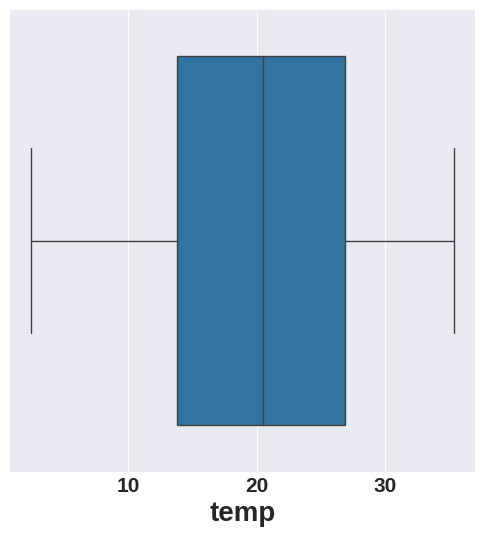

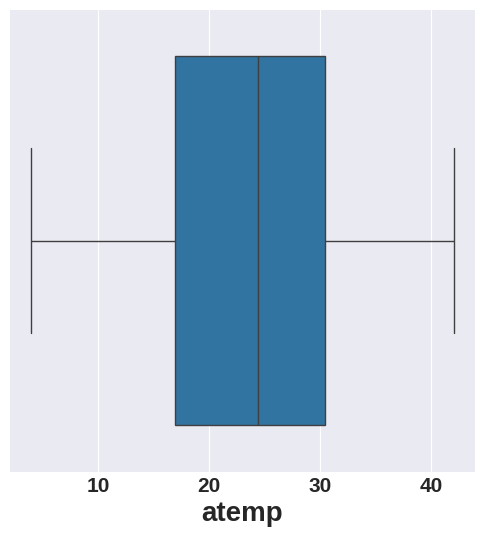

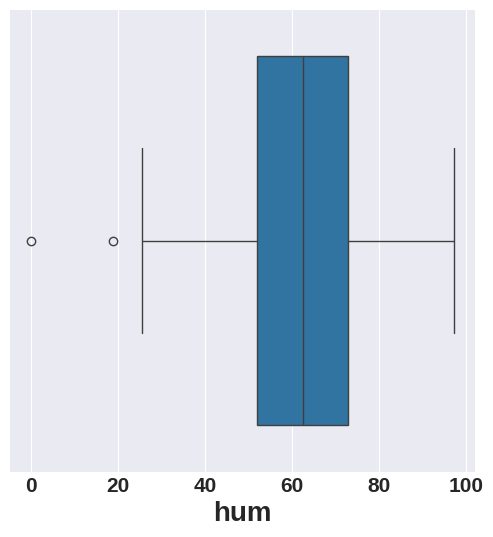

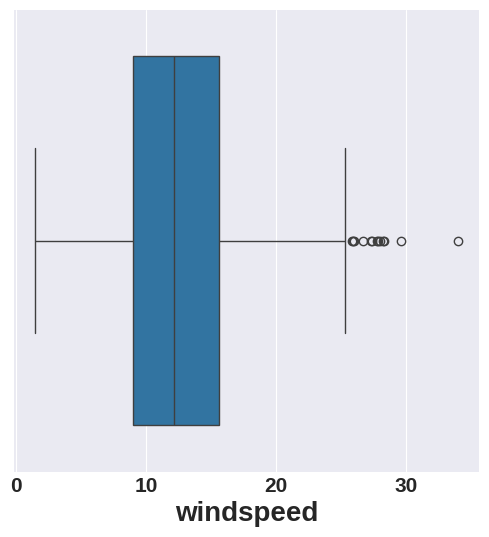

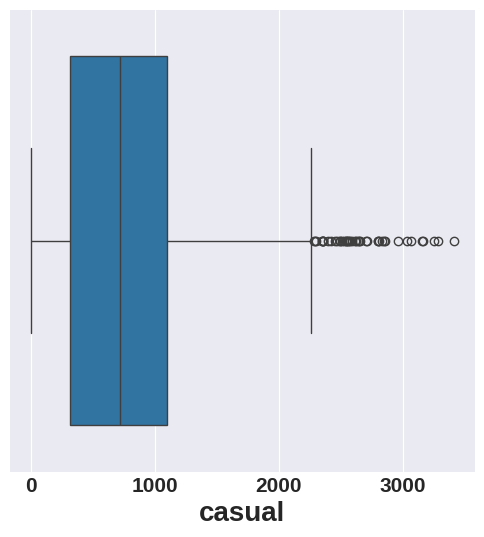

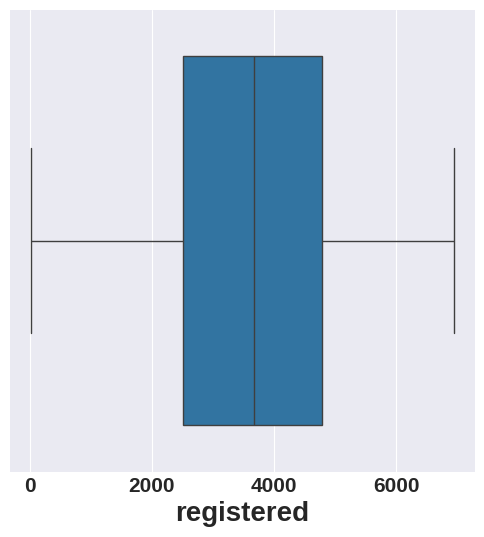

In [ ]:
# Plotting box plot of numeric columns to check outliers
for col in numeric_features:
  fig = plt.figure(figsize = (6,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

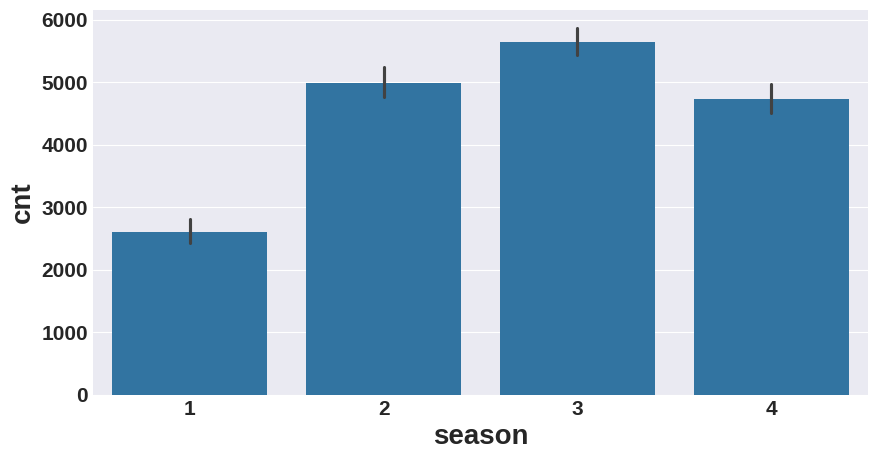

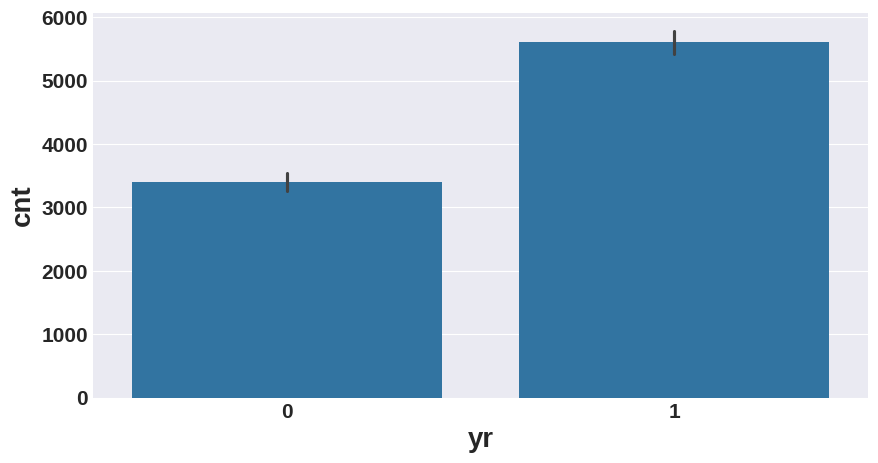

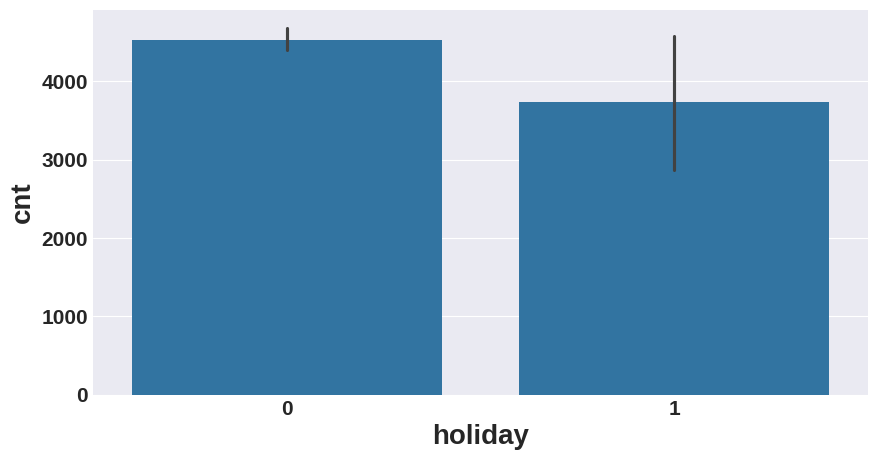

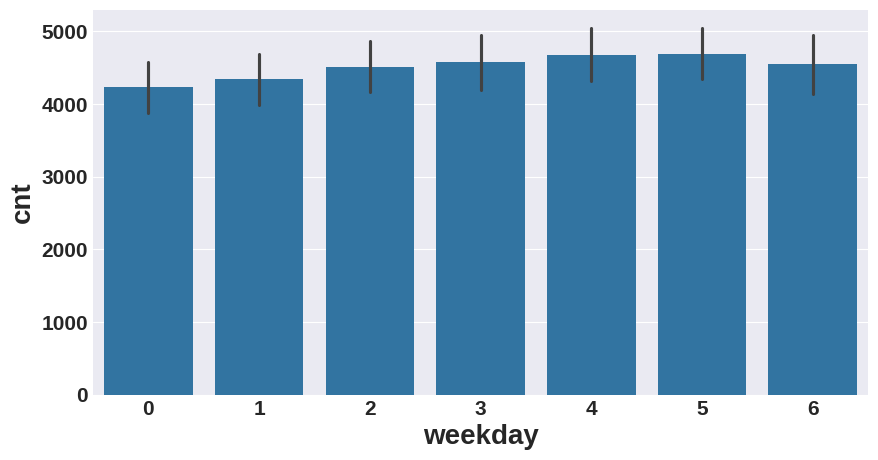

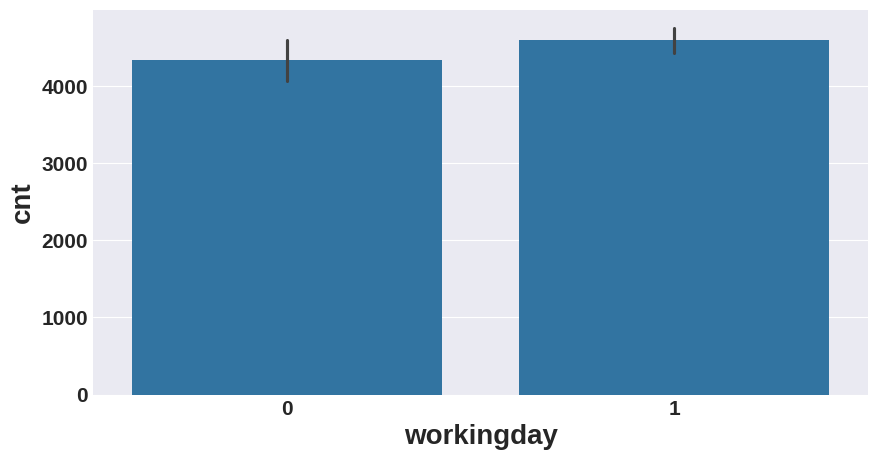

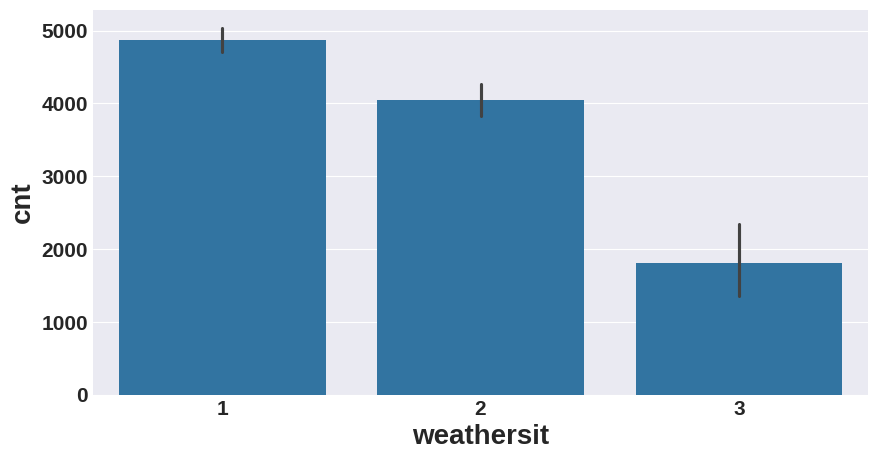

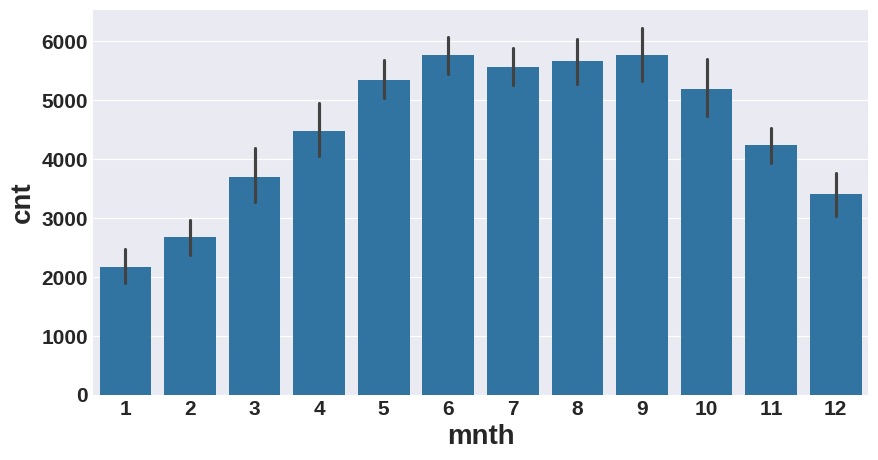

In [ ]:
# Plot barchart plot for each categorical column with respect to target variable to get insights
for col in categorical_cols:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

Text(0.5, 1.0, 'Bike Rental Trend according to month on Holiday / No Holiday')

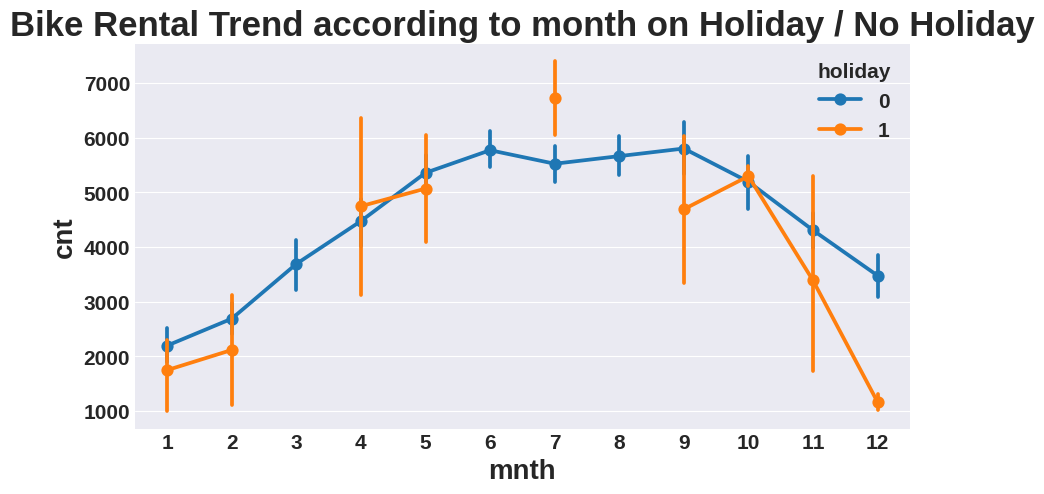

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['mnth'],y = dataset['cnt'],hue = dataset['holiday'])
plt.title("Bike Rental Trend according to month on Holiday / No Holiday")

<Axes: xlabel='cnt'>

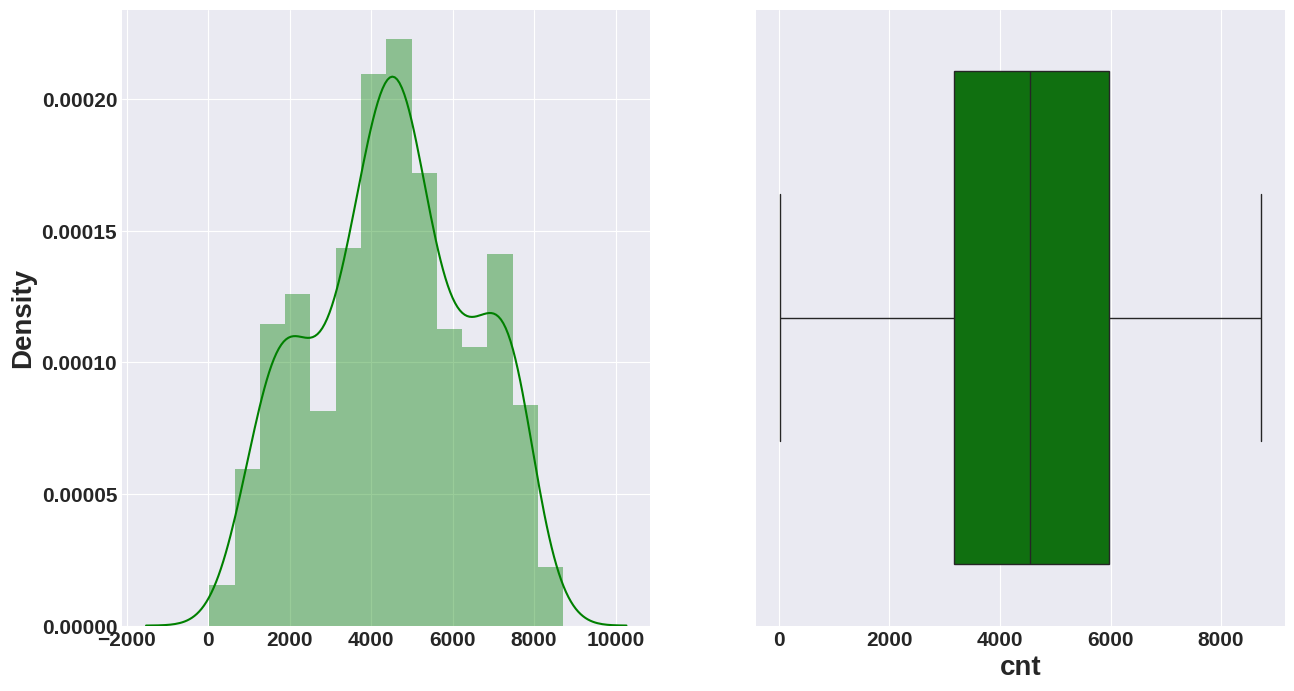

In [ ]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

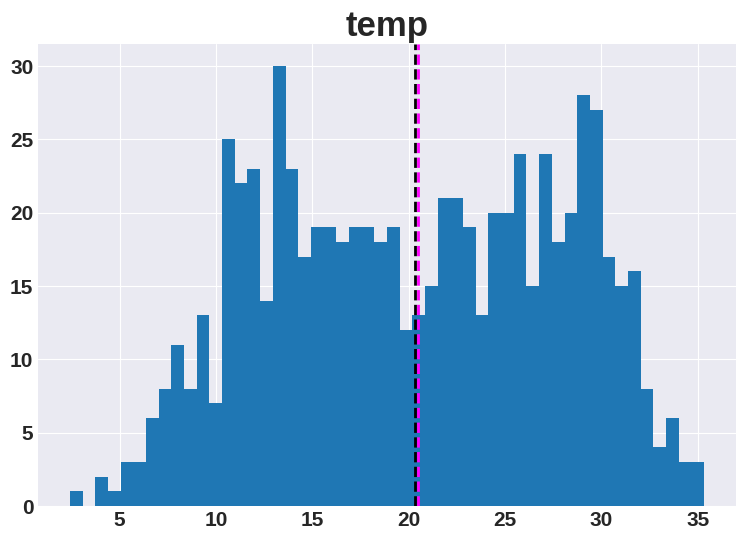

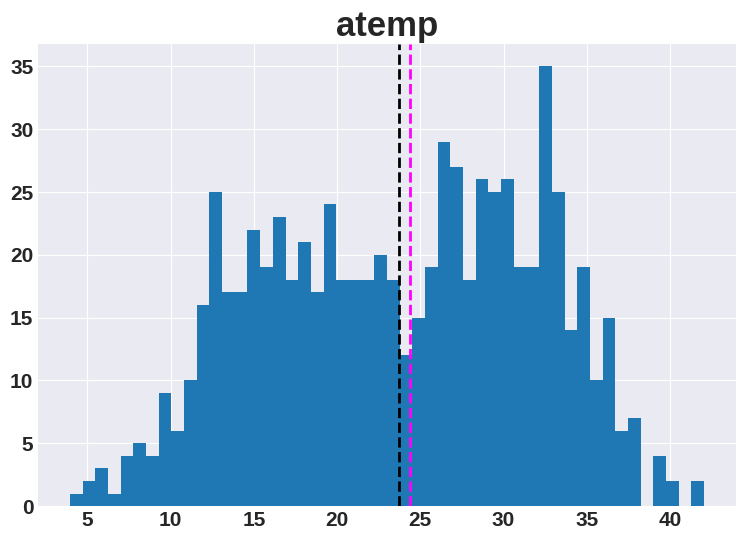

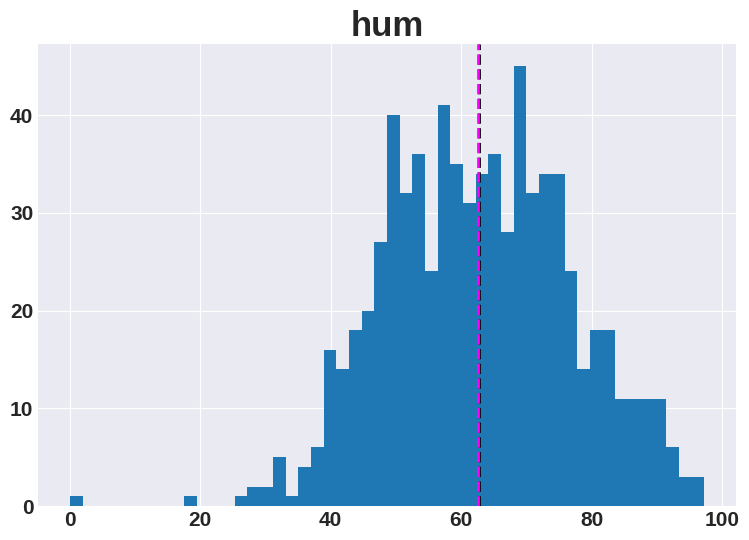

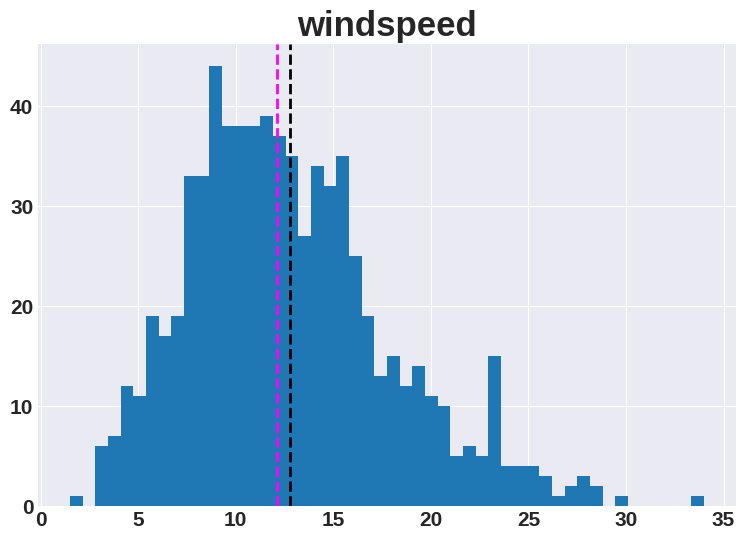

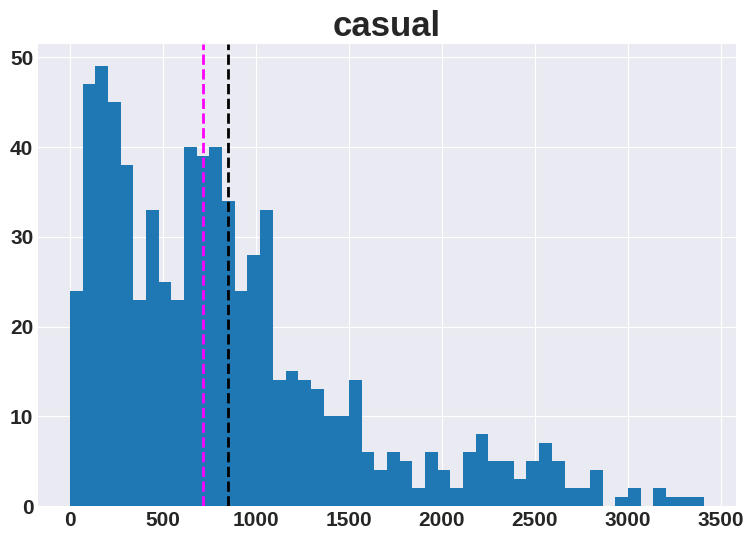

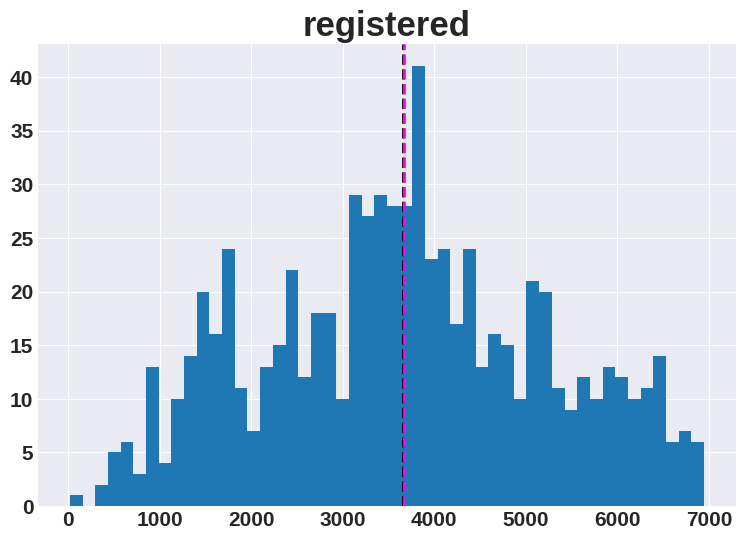

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

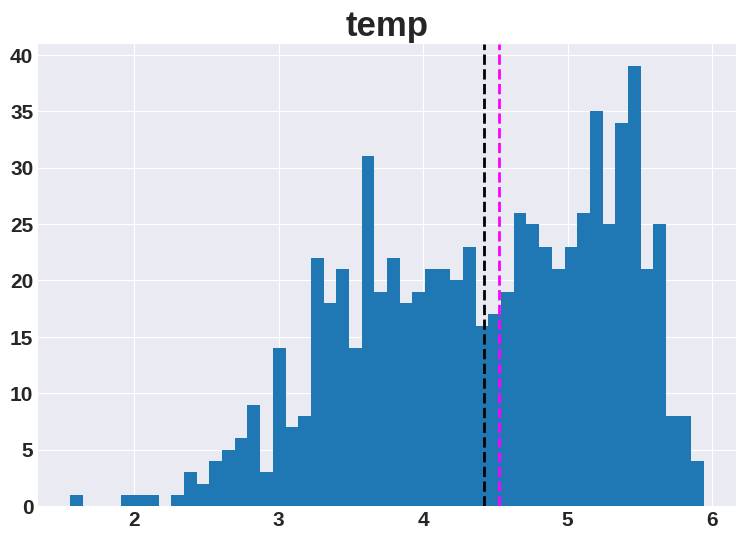

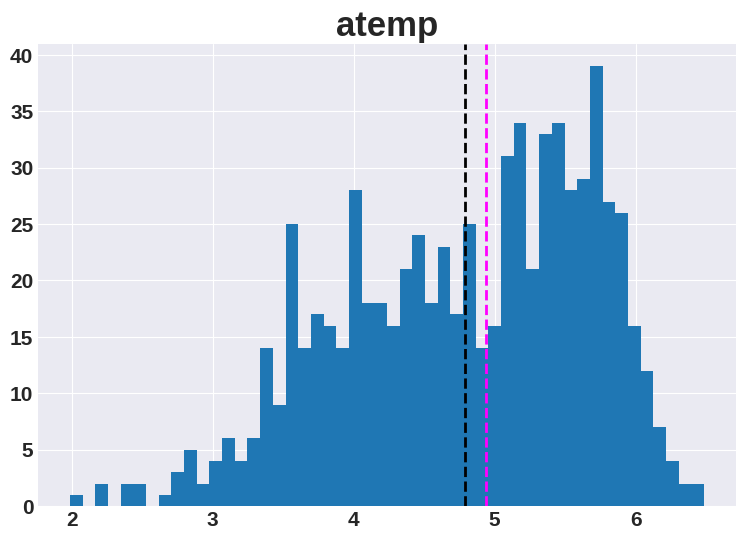

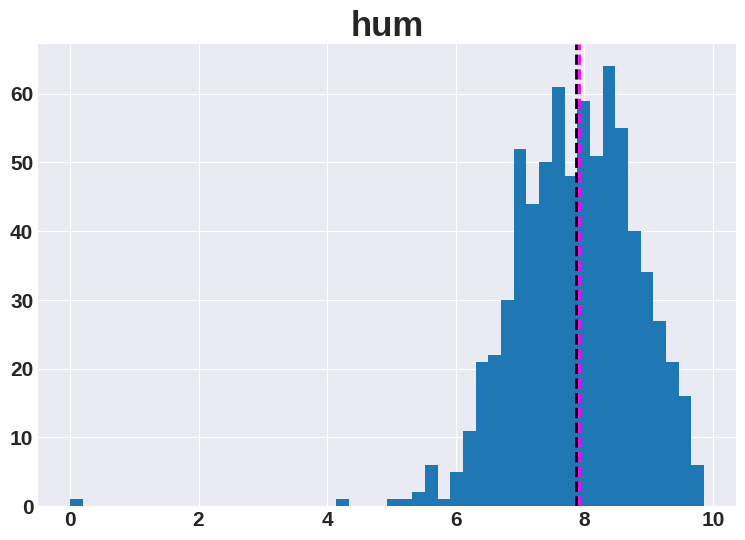

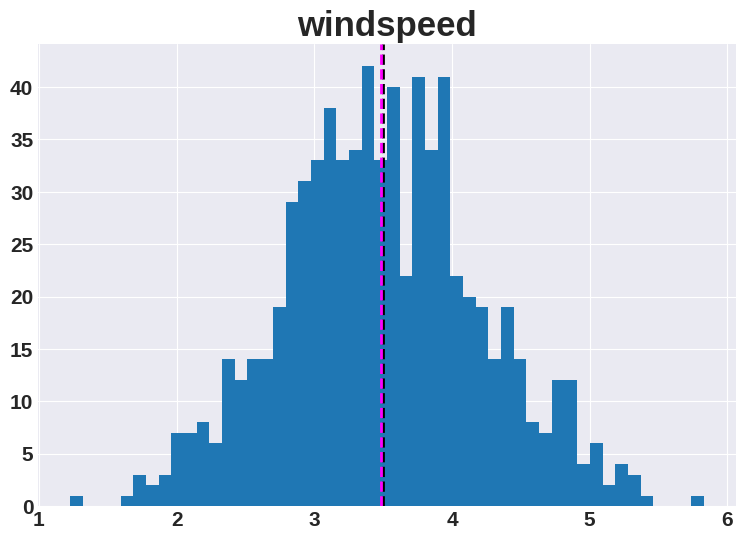

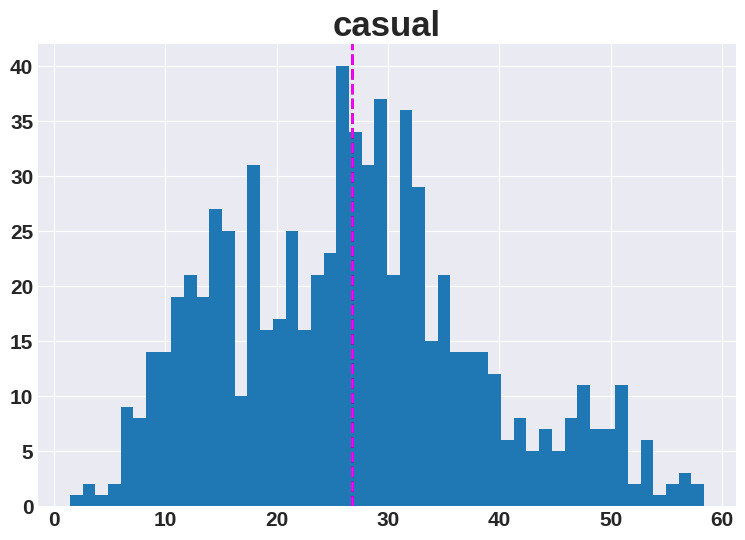

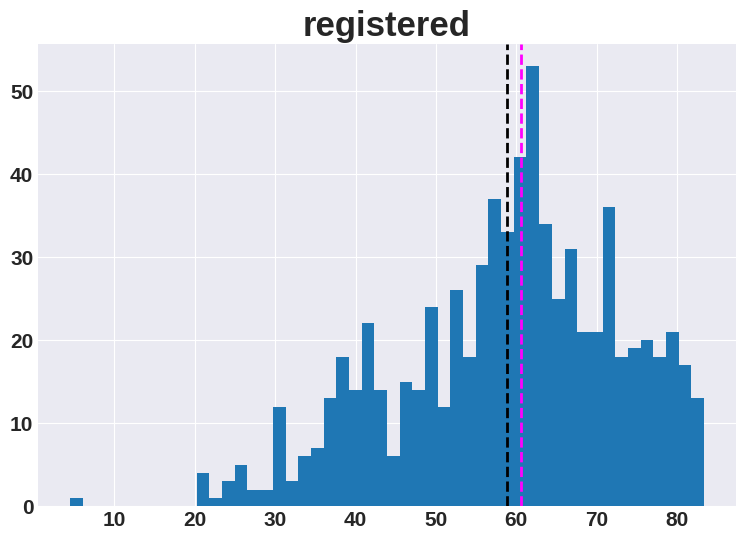

In [ ]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

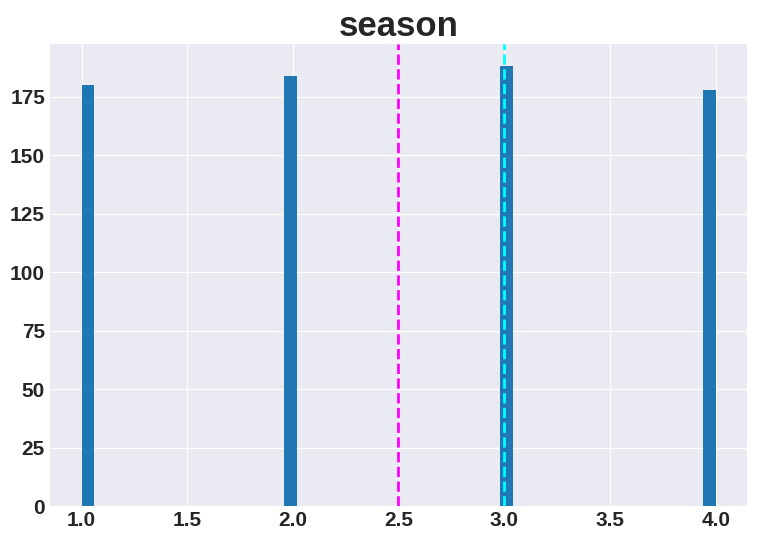

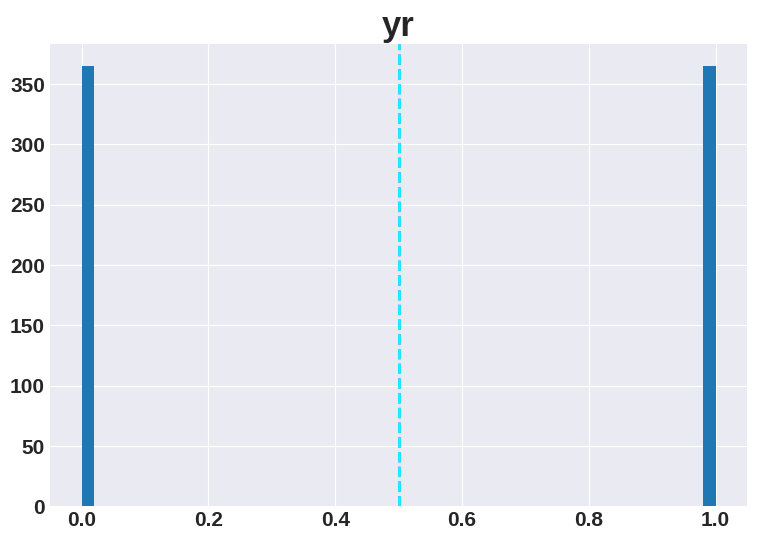

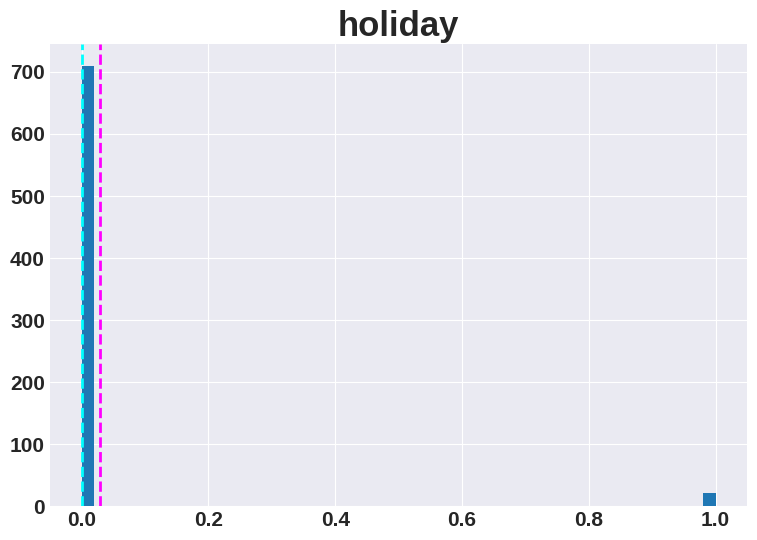

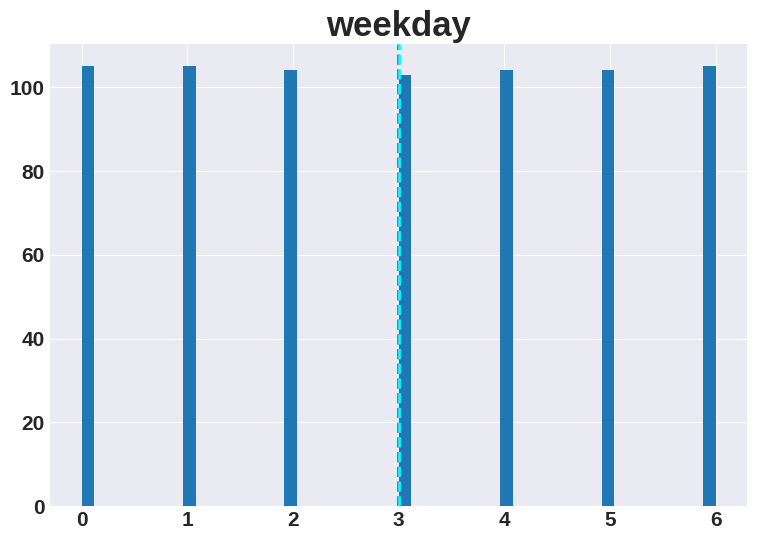

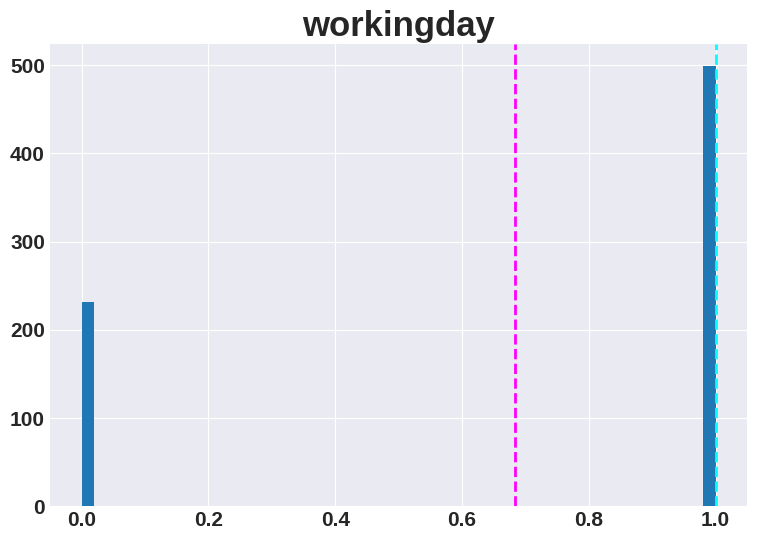

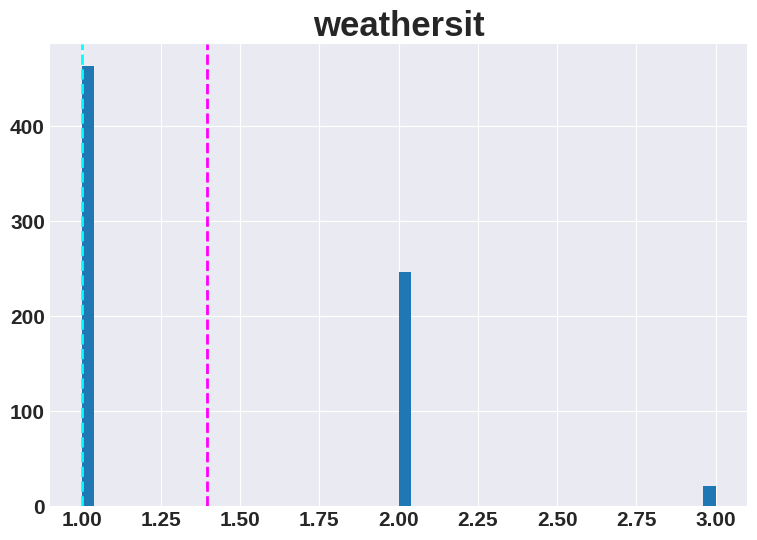

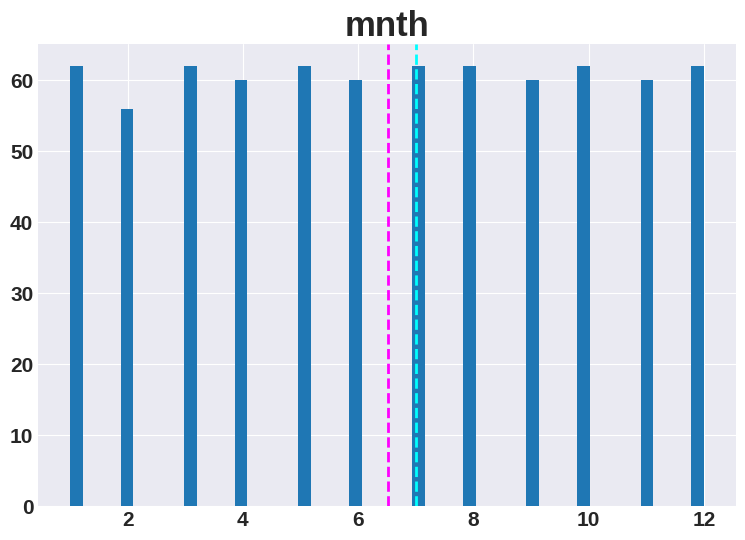

In [ ]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

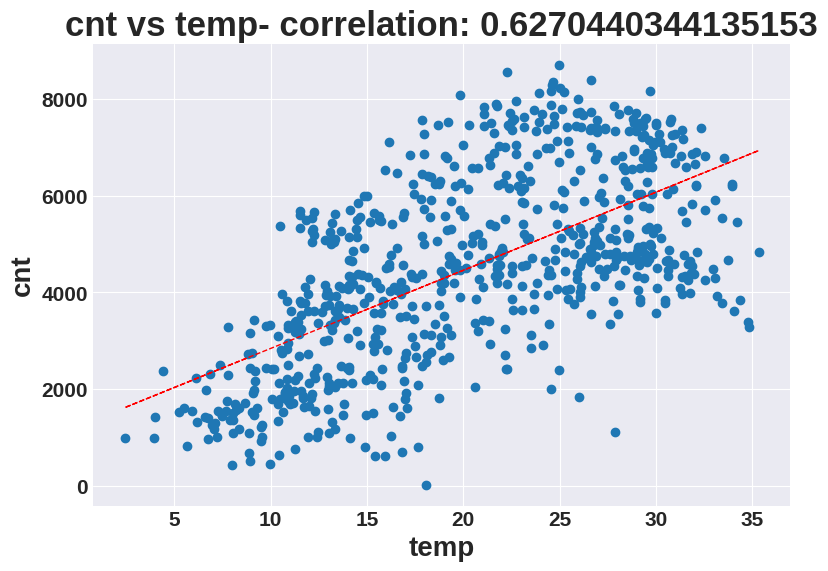

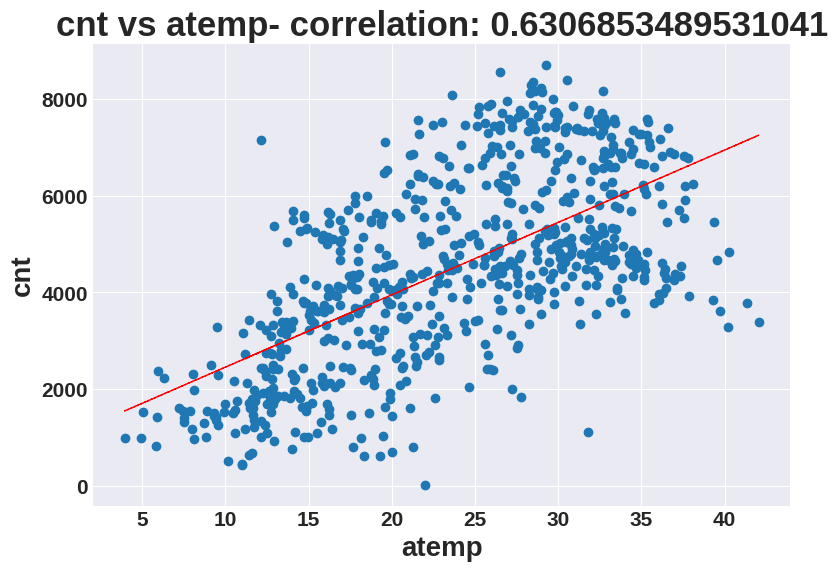

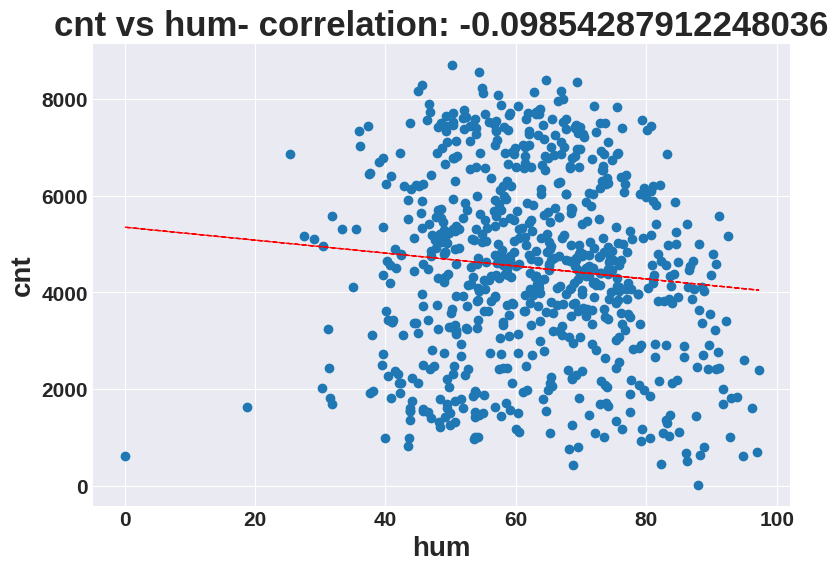

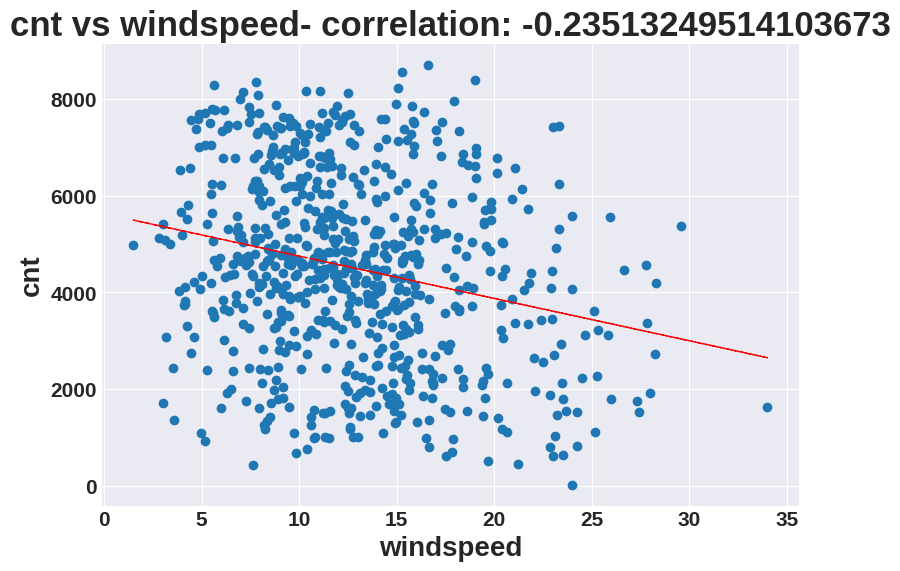

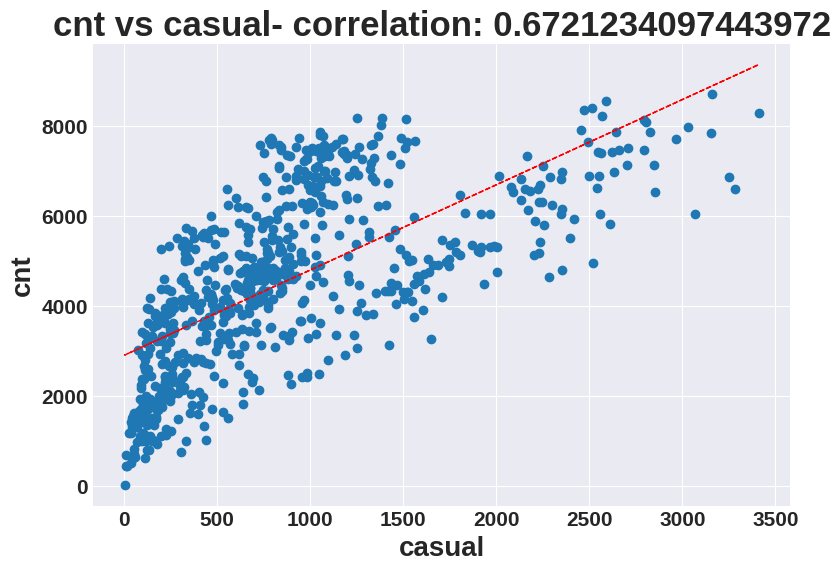

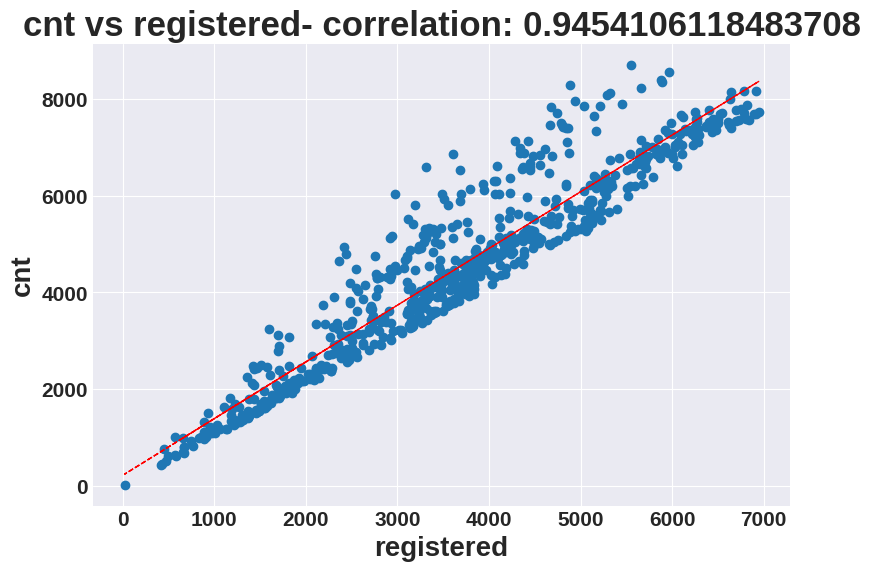

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('cnt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

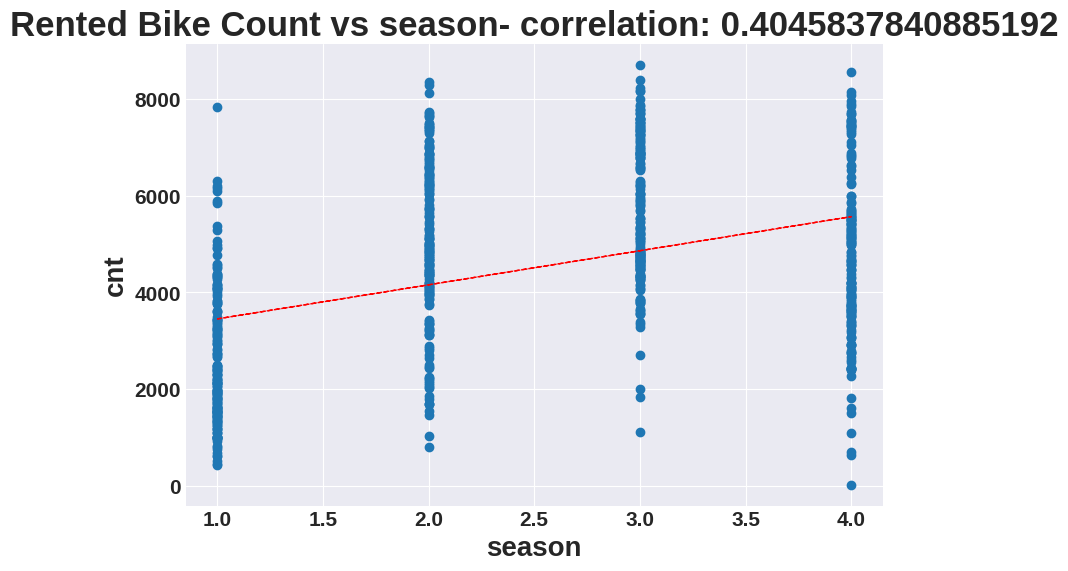

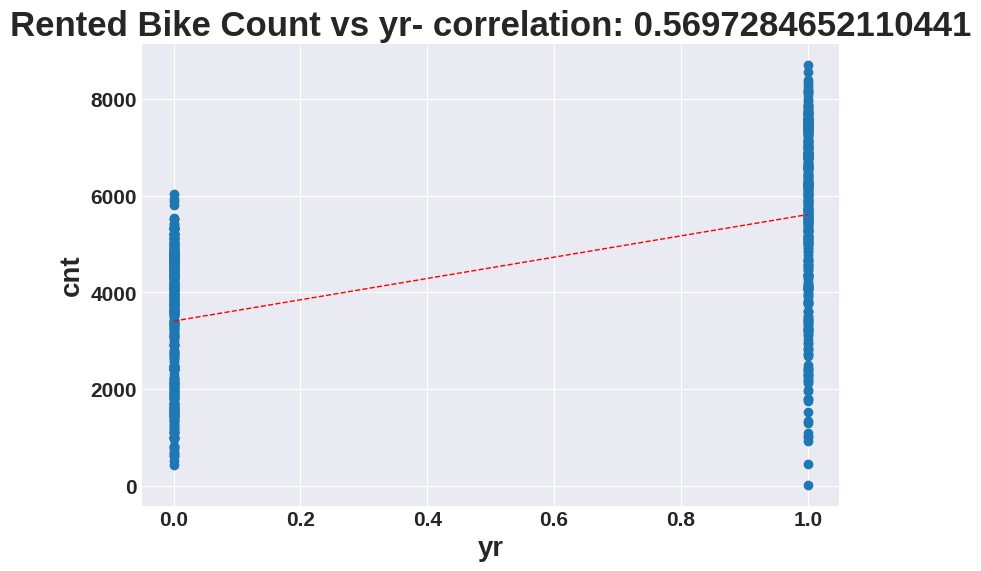

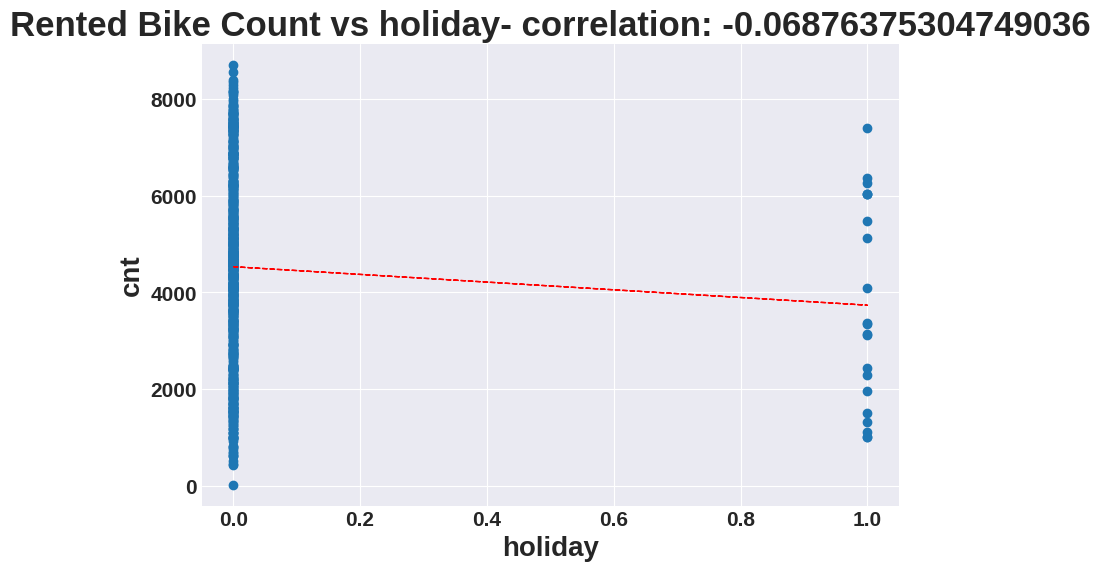

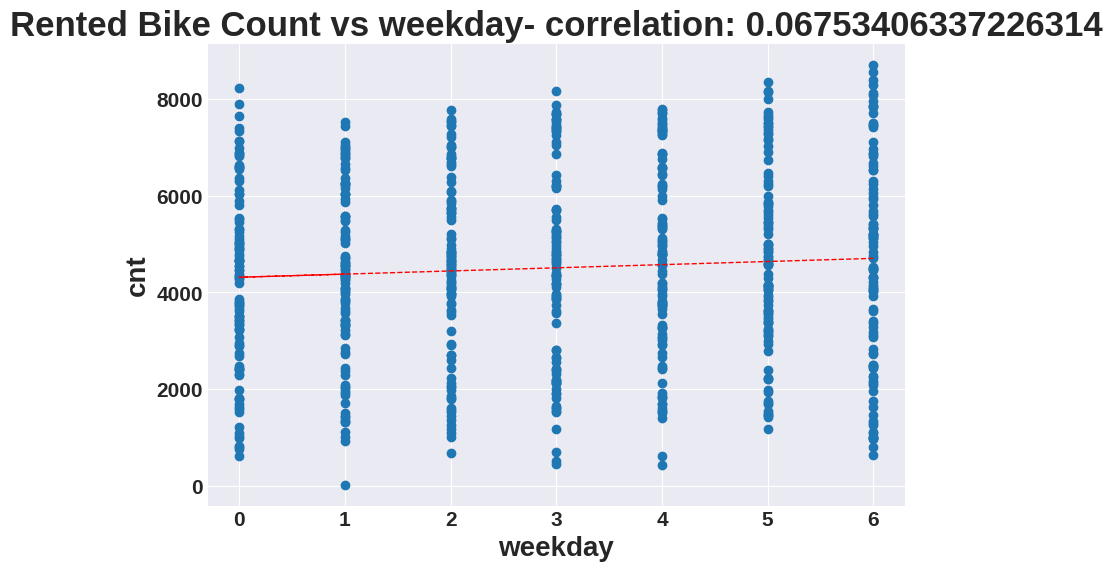

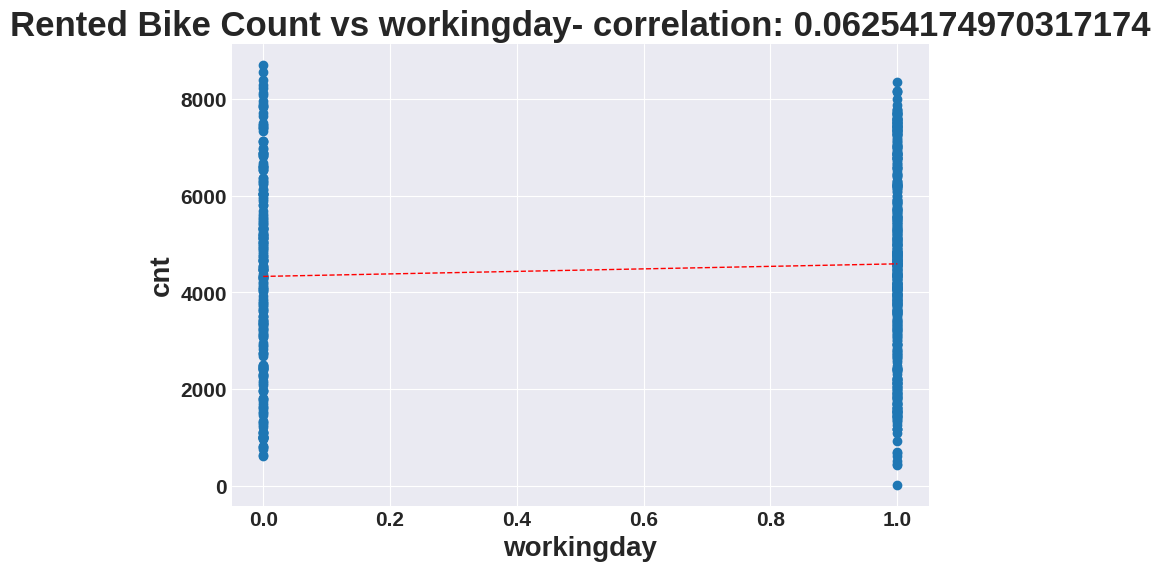

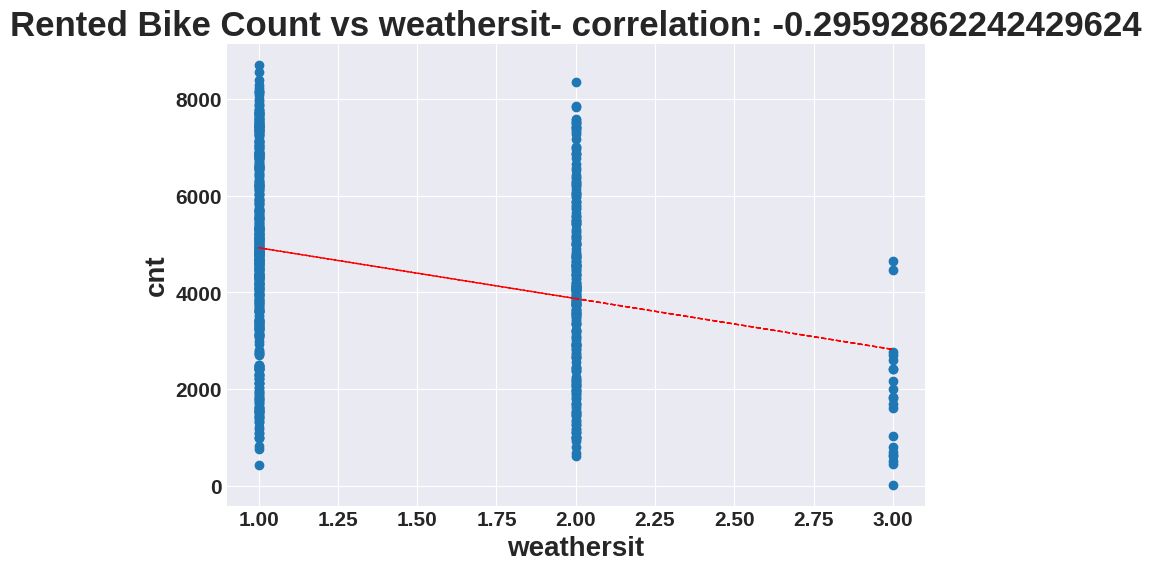

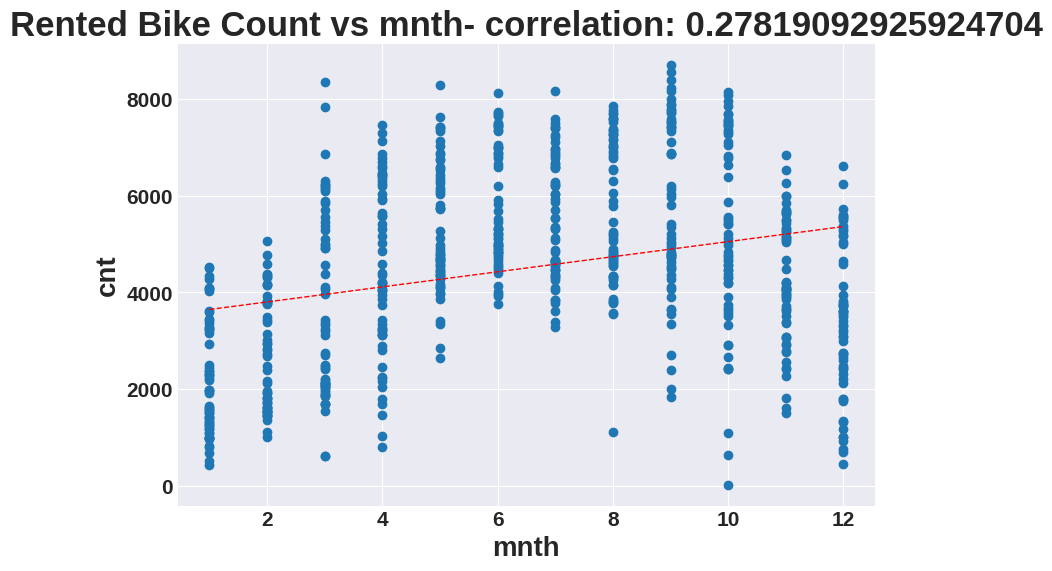

In [ ]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

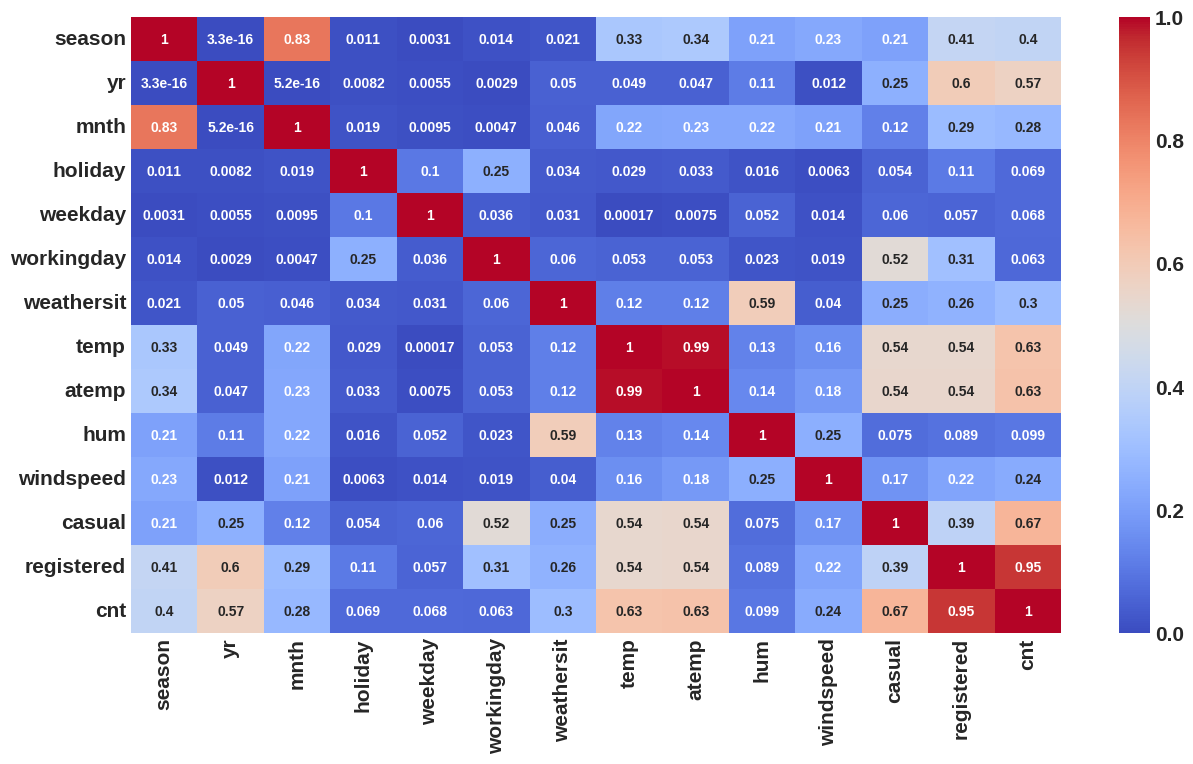

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Make copy of dataset
df = dataset.copy()

In [ ]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [ ]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
dependent_variable = 'cnt'

In [ ]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weathersit',
 'weekday',
 'mnth',
 'yr',
 'atemp',
 'season',
 'windspeed',
 'casual',
 'registered',
 'holiday',
 'temp',
 'hum',
 'workingday']

In [ ]:
y = np.sqrt(df['cnt'])

X = df.drop('cnt',axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train[0:10]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
239,3,0,8,0,0,0,1,28.989419,32.39795,56.1765,20.412153,1415,2919
97,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299
503,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
642,4,1,10,0,5,1,1,25.215000,29.00935,62.7500,7.125450,1516,6640
498,2,1,5,0,1,1,2,23.506653,27.49500,78.9583,14.250364,342,2501
303,4,0,10,0,1,1,1,13.940000,17.80315,70.3333,7.125450,362,3307
570,3,1,7,0,3,1,1,29.690847,32.70270,45.0000,11.041600,1383,6790
250,3,0,9,0,4,1,3,25.990433,27.76805,93.9565,12.914116,153,1689
17,1,0,1,0,2,1,2,8.883347,11.61665,86.1667,9.833925,9,674
595,3,1,8,0,0,0,2,26.069153,30.17770,71.1667,5.792150,1208,3341


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(584, 13)
(584,)
(146, 13)


In [ ]:
X_train[0:10]

array([[0.66666667, 0.        , 0.63636364, 0.        , 0.        ,
        0.        , 0.        , 0.80735084, 0.76125831, 0.42821087,
        0.65710461, 0.41461268, 0.41856772],
       [0.33333333, 0.        , 0.27272727, 0.        , 0.83333333,
        1.        , 0.5       , 0.34478502, 0.32839414, 0.81032474,
        0.46257665, 0.04988263, 0.18466647],
       [0.33333333, 1.        , 0.36363636, 0.        , 1.        ,
        0.        , 0.        , 0.67395007, 0.65280006, 0.28132217,
        0.1043704 , 1.        , 0.70228126],
       [1.        , 1.        , 0.81818182, 0.        , 0.83333333,
        1.        , 0.        , 0.69264081, 0.67056933, 0.51972135,
        0.16041174, 0.44424883, 0.95581865],
       [0.33333333, 1.        , 0.36363636, 0.        , 0.16666667,
        1.        , 0.5       , 0.64072168, 0.63004084, 0.74535905,
        0.42676029, 0.09976526, 0.35821542],
       [1.        , 0.        , 0.81818182, 0.        , 0.16666667,
        1.        , 0.     

In [ ]:
rir = Ridge().fit(X_train,y_train)
y_pred_train_rir = rir.predict(X_train)

# y predictions on test data
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

In [ ]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(MSE,4)}, 'RMSE': {round(RMSE,4)}, 'MAE': {round(MAE,4)}, 'R2': {round(R2,4)}]")

In [ ]:
rir = Ridge().fit(X_train,y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

In [ ]:
get_metrics(y_test,y_pred_rir,"Ridge")
get_metrics(y_test,y_pred_lar,"Lasso")

Ridge : ['MSE': 6.2612, 'RMSE': 2.5022, 'MAE': 1.8019, 'R2': 0.979]
Lasso : ['MSE': 48.6397, 'RMSE': 6.9742, 'MAE': 5.3933, 'R2': 0.8366]


# Save the Model

In [ ]:
import pickle
import os

dir = r"/content/drive/MyDrive/Infosys/Models"
model_file_name = "ridge_regressor_r2_0_979_1.pkl"
model_file_path = os.path.join(dir, model_file_name)

pickle.dump(rir, open(model_file_path, "wb"))